¡Hola, Carlos!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Carlos! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario acerca de un filtro que te faltó para usar los datos requeridos en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

In [2]:
# Importo las librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Analisis Exploratorio de Datos

In [3]:
# Importo mis DF's
names_df = pd.read_csv('databases/moved_project_sql_result_01.csv')
drop_df = pd.read_csv('databases/moved_project_sql_result_04.csv')
hipotesis_df = pd.read_csv('databases/moved_project_sql_result_07.csv')

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de la información y las librerias necesarias para el análisis. Solamente que como buena práctica te recomiendo cargar todas las bases juntas

In [4]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
# Busco valores duplicados
print('Valores duplicados en names_df:',names_df.duplicated().sum())
print('Valores duplicados en drop_df:',names_df.duplicated().sum())

Valores duplicados en names_df: 0
Valores duplicados en drop_df: 0


Tras estudiar ambos datasets puedo afirmar que tienen los datos correctos, en ninguno de los dos datasets encontre datos ausentes y el tipo de datos que incluyen es correcto, 'company_name' y 'dropoff_location_name' son del tipo object, 'trips_amount' es del tipo entero [Lo que se espera ya que no puede haber fracción de viaje] y finalmente 'average_trips'
es del tipo float ya que es un promedio de viajes en cada barrio.

In [7]:
# Aqui buscamos los 10 barrios principales en terminos de finalización de recorrido
top10_drop = drop_df.sort_values(by='average_trips', ascending=False).head(10)
top10_drop

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
# Aqui buscamos ahora el top 10 de empresas
top10_company = names_df.sort_values(by='trips_amount', ascending=False).head(10)
top10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo realizar un análisis de duplicados 




Ya agregue mi analisis de duplicados, ambos son 0's

/var/folders/75/n09kg0s137s895fc3yg04jg00000gn/T/ipykernel_8714/3260592455.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/75/n09kg0s137s895fc3yg04jg00000gn/T/ipykernel_8714/3260592455.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


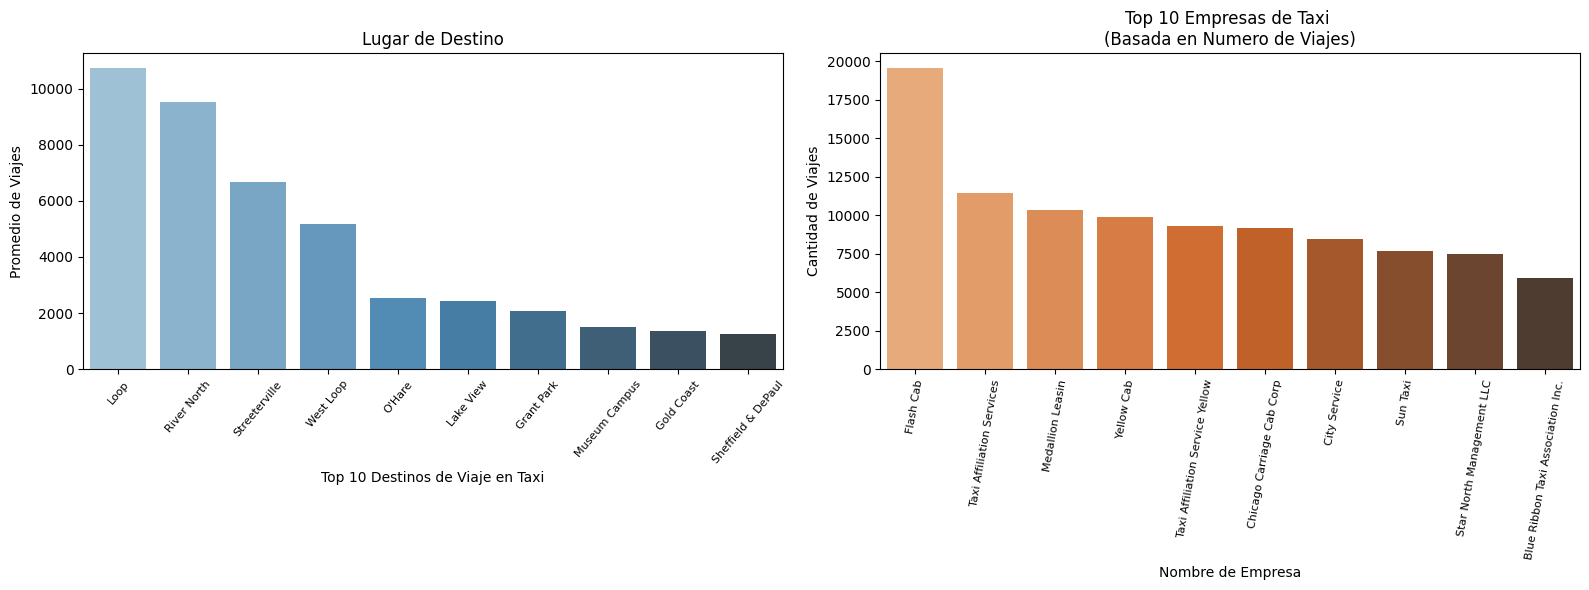

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparo mis gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ax 1 - Bar - Top 10 Drop-Off Locations (Pastel Orange)
sns.barplot(
    data=top10_drop,
    x='dropoff_location_name',
    y='average_trips',
    ax=axes[0],
    palette='Blues_d'
).set(
    xlabel='Top 10 Destinos de Viaje en Taxi',
    title='Lugar de Destino',
    ylabel='Promedio de Viajes',
)

# Ax 2 - Bar - Top 10 Company (Pastel Purple)
sns.barplot(
    data=top10_company, 
    x='company_name', 
    y='trips_amount',
    ax=axes[1],
    palette='Oranges_d'
).set(
    title='Top 10 Empresas de Taxi \n(Basada en Numero de Viajes)',
    xlabel='Nombre de Empresa',
    ylabel='Cantidad de Viajes'
)

# Rotate X labels in both graphs
axes[0].tick_params(axis='x', rotation=50, labelsize=8)
axes[1].tick_params(axis='x', rotation=80, labelsize=8)

plt.tight_layout()  # ✅ Adjust layout to prevent label cutoff
plt.show()

No tenemos información muy especifica que se podria recopilar, lo que si sabemos es que los 4 destinos principales tienen mas del doble de promedio de viajes que del 5to en adelante. estos siendo Loop, River North, Streeterville y West Loop en ese orden. Por lo que hay que tener unidades siempre disponibles para llevar a esos destinos, algo importante podria ser ver cual zona manda mas a esos destinos y a que horas. Estudiando eso podriamos saber donde empezar a colocar mas taxis diariamente.

Por otra parte la empresa que mas viajes realiza es Flash Cab con casi el dible de viajes comparandola con el segundo lugar, que es Taxi Affiliation Services. Es una cantidad muy grande de diferencia.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente forma de realizar las gráficas para mostrar los resultados. 



## Prueba de Hipótesis

Prueba la hipotesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [10]:
# Uso info para ver la estructura del DF
hipotesis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
hipotesis_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
# Asegurar que la columna de fecha es de tipo datetime
hipotesis_df['start_ts'] = pd.to_datetime(hipotesis_df['start_ts'])
# Filtrar solo los viajes que ocurrieron en sábados
hipotesis_df['weekday'] = hipotesis_df['start_ts'].dt.day_name()
saturday_trips = hipotesis_df[hipotesis_df['weekday'] == 'Saturday']

# Crear los dos grupos: sábados lluviosos ("bad") y sábados no lluviosos ("good")
rainy_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = saturday_trips[saturday_trips['weather_conditions'] == 'Good']['duration_seconds']

alpha = 0.05

# Prueba de Levene para igualdad de varianzas
levene_stat, p_var = st.levene(rainy_saturdays, non_rainy_saturdays)

# Decisión sobre varianzas
if p_var < alpha:
    print("Rechazamos la hipótesis nula de Levene: Las varianzas son significativamente diferentes.\n")
    ttest_var = False  # Usamos Welch’s t-test
else:
    print("No rechazamos la hipótesis nula de Levene: No hay evidencia suficiente para decir que las varianzas son diferentes.\n")
    ttest_var = True   # Usamos Student's t-test

# Prueba t con la opción correcta de varianza
results_rain = st.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=ttest_var)

print('valor p:', results_rain.pvalue) 

# Decisión final sobre la hipótesis nula
if results_rain.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración de los viajes.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en la duración de los viajes.")

No rechazamos la hipótesis nula de Levene: No hay evidencia suficiente para decir que las varianzas son diferentes.

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración de los viajes.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la prueba de hipótesis. Además, lo complementas con la prueba de levene para msotrar el supuesto de varinzas iguale

La prueba de hipotesis sugiere que SI cambia la duración de los viajes los dias sabados lluviosos contra sabados no lluviosos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Carlos, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    